In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import cm
import seaborn as sns
sns.set_theme()
import pandas as pd
import numpy as np
from statannot import add_stat_annotation


In [17]:
exp_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/123_natives_2_state")

analysis_df = pd.read_csv(Path(exp_dir, "score_analysis_rmsd.csv"))
analysis_df.head()



,Unnamed: 0,index,N,J,job,xray_0,xray_1,xray_0+xray_1,r_free_0,r_free_1,...,w_0_0,w_0_1,w_1_0,w_1_1,w_2_0,w_2_1,w_3_0,w_3_1,pdb,ff
0,0,0,1,1,0,6.067413,NaN,NaN,0.344104,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/wynton/group/sali/mhancock/xray/sample_bench/...,3110.291295
1,1,0,1,1,1,5.562933,NaN,NaN,0.191864,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/wynton/group/sali/mhancock/xray/sample_bench/...,4133.435368
2,4,0,1,1,2,5.988707,NaN,NaN,0.315791,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/wynton/group/sali/mhancock/xray/sample_bench/...,3126.090873
3,2,0,1,1,3,5.974035,NaN,NaN,0.308972,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/wynton/group/sali/mhancock/xray/sample_bench/...,3224.973131
4,3,0,1,1,4,5.854586,NaN,NaN,0.260544,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/wynton/group/sali/mhancock/xray/sample_bench/...,3521.892847


/Users/matthew/opt/anaconda3/envs/plot/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/matthew/opt/anaconda3/envs/plot/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_1 v.s. 2_2: t-test paired samples with Bonferroni correction, P_val=1.677e-01 stat=2.506e+00
1_1 v.s. 1_2: t-test paired samples with Bonferroni correction, P_val=1.532e-01 stat=2.561e+00
4_1 v.s. 4_2: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-6.300e-01
1_2 v.s. 2_2: t-test paired samples with Bonferroni correction, P_val=3.200e-04 stat=6.989e+00
2_2 v.s. 4_2: t-test paired samples with Bonferroni correction, P_val=1.475e-02 stat=-4.035e+00


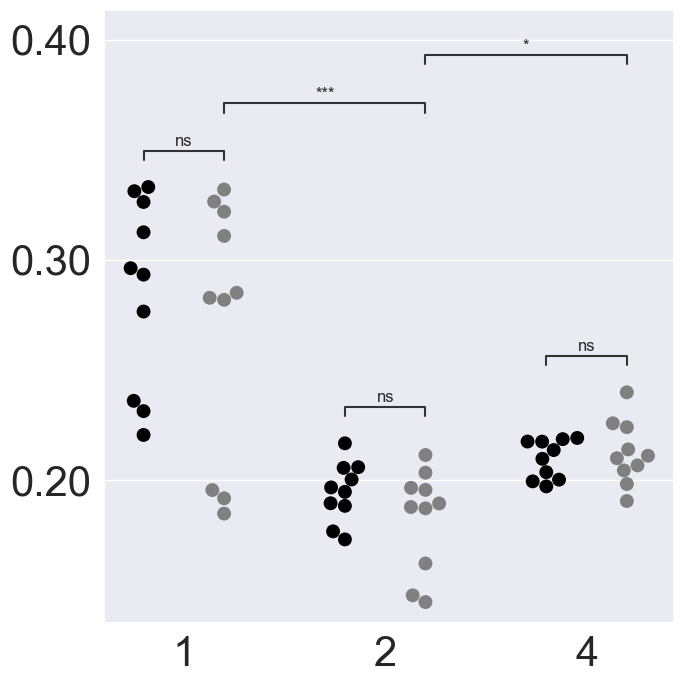

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))

field = "rmsd_0"
ax = sns.swarmplot(x="N", y="rmsd_0", data=analysis_df, hue="J", dodge=True, palette=["black", "gray"], legend=None, size=10)
add_stat_annotation(ax, data=analysis_df, x="N", y="rmsd_0", hue="J",
                    box_pairs=[((1, 1), (1, 2)),
                                 ((2, 1), (2, 2)),
                                 ((4, 1), (4, 2)),
                                 ((1, 2), (2, 2)),
                                 ((2, 2), (4, 2))
                                ],
                    test='t-test_paired', text_format='star', loc='inside', verbose=2)

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
ax.yaxis.set_major_locator(ticker.MaxNLocator(3))

plt.xlabel(None)
plt.ylabel(None)

def two_decimal_places(x, pos):
    return f'{x:.2f}'
ax.yaxis.set_major_formatter(FuncFormatter(two_decimal_places))

plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))



In [32]:
for state in [1, 2, 4]:
    for cond in [1, 2]:
        print(state, cond)
        N_J_analysis_df = analysis_df[(analysis_df["N"] == state) & (analysis_df["J"] == cond)]

        if cond == 1:
            fields = ["xray_0", "r_free_0", "rmsd_0"]
        elif cond == 2:
            fields = ["xray_0+xray_1", "xray_0", "r_free_0", "xray_1", "rmsd_0+rmsd_1", "rmsd_0", "rmsd_1"]

        for field in fields:
            scores = N_J_analysis_df[field].values
            print(field, np.mean(scores), np.std(scores))

1 1
xray_0 5.812405492865105 0.19708830457495002
r_free_0 0.26260672092554704 0.05341830331420671
rmsd_0 0.31071291672017604 0.05069106776283087
1 2
xray_0+xray_1 11.34394497131596 0.463025883455371
xray_0 5.653232345830251 0.25433914811251385
r_free_0 0.2163956744195669 0.050399609763225175
xray_1 5.69071262548571 0.21728968830014664
rmsd_0+rmsd_1 0.3013358242972027 0.055212521247539524
rmsd_0 0.29514554431760137 0.0660052624141188
rmsd_1 0.3075261042768041 0.049535074472315345
2 1
xray_0 5.330881805824969 0.10501533317507585
r_free_0 0.18770186438617656 0.03186783067372942
rmsd_0 0.21065185297051822 0.015454736264945238
2 2
xray_0+xray_1 10.11398804014002 0.1875647741692065
xray_0 5.053813630619604 0.10371113873932691
r_free_0 0.1378333982068714 0.021467229137185097
xray_1 5.060174409520416 0.08510283711710198
rmsd_0+rmsd_1 0.2024250794125917 0.021640352942039223
rmsd_0 0.20060789265927367 0.023335517184191863
rmsd_1 0.20424226616590974 0.02035984358875432
4 1
xray_0 5.19348833056451

In [20]:
### Get best structure for each N and J
for state in [1, 2, 4]:
    for cond in [1, 2]:
        print(state, cond)
        N_J_analysis_df = analysis_df[(analysis_df["N"] == state) & (analysis_df["J"] == cond)]

        if cond == 1:
            field = "xray_0"
        elif cond == 2:
            field = "xray_0+xray_1"

        best_model = N_J_analysis_df[N_J_analysis_df[field] == N_J_analysis_df[field].max()].iloc[0]
        print(best_model["pdb"])

        for j in range(cond):
            ws = ""

            for i in range(state):
                print(round(best_model["w_{}_{}".format(i,j)], 2))



1 1
/wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/125_natives_1_state/0/output_38/pdbs/1169.pdb
1.0
1 2
/wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/145_native_1_state_2_cond/0/output_191/pdbs/543.pdb
1.0
1.0
2 1
/wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/123_natives_2_state/6/output_861/pdbs/719.pdb
0.56
0.44
2 2
/wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/124_natives_2_cond/8/output_376/pdbs/436.pdb
0.37
0.63
0.37
0.63
4 1
/wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/141_native_4_state_1_cond/6/output_53/pdbs/426.pdb
0.35
0.31
0.32
0.02
4 2
/wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/142_native_4_state_2_cond/1/output_813/pdbs/299.pdb
0.32
0.49
0.11
0.08
0.28
0.45
0.22
0.05


In [6]:
all_scores = list()
for i in range(files_arr.shape[0]):
    for j in range(files_arr.shape[1]):
        score_df = score_dfs[i,j]
        if j == 0:
            scores = score_df["rmsd_0"].values
        else:
            scores = score_df["rmsd_0+rmsd_1"].values

        all_scores.extend(scores)

KeyError: 'rmsd_0'

In [27]:
np.min(all_scores), np.max(all_scores)

ValueError: zero-size array to reduction operation minimum which has no identity